# 🧠 Theory: Morphological Transformations

Morphological operations are **shape-based image transformations**, mainly performed on **binary images**. They require:

- An input image
- A **structuring element** (kernel) that defines the operation

The two **fundamental operations** are:
- **Erosion**
- **Dilation**

All other operations (Opening, Closing, etc.) are combinations or variations of these two.

---

## 1️⃣ Erosion

- Removes boundaries of **white (foreground)** regions.
- Only keeps a pixel **if all kernel pixels** under it are white.
- Result: **Shrinks** white areas.

Useful for:
- Removing small white noise
- Separating connected objects

```python
kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(img, kernel, iterations=1)

🖼️ **Result:** Foreground becomes thinner.

---

### 2️⃣ Dilation  
**Opposite of erosion.**  

- Pixel is white if **any** kernel pixel under it is white.  
- **Result:** Expands white areas.  

**Useful for:**  
- Joining broken parts  
- Restoring eroded objects

```py
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

🖼️ **Result:** Foreground grows in size.

---

### 3️⃣ Opening  
**Erosion followed by Dilation**  

- Removes small objects (noise) while preserving shape/size of larger objects.

```py
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)


🖼️ **Result:** Cleaned image with noise removed.

---

### 4️⃣ Closing  
**Dilation followed by Erosion**  

- Closes small black holes inside white regions.

```py
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)


🖼️ **Result:** Holes inside objects are filled.

---

### 5️⃣ Morphological Gradient  
**Difference between dilation and erosion**  

- Highlights the outline of objects.

```py
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

🖼️ **Result:** Object boundaries are highlighted.

---

### 6️⃣ Top Hat  
**Difference between original image and its Opening**  

- Highlights small white regions on dark background.

```py
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

🖼️ **Result:** Emphasizes small bright details.

---

### 7️⃣ Black Hat  
**Difference between Closing and original image**  

- Highlights small black regions on white background.

```py
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)


**🖼️ Result:** Emphasizes small dark details.

---

### Implement of all Morphological Transformations

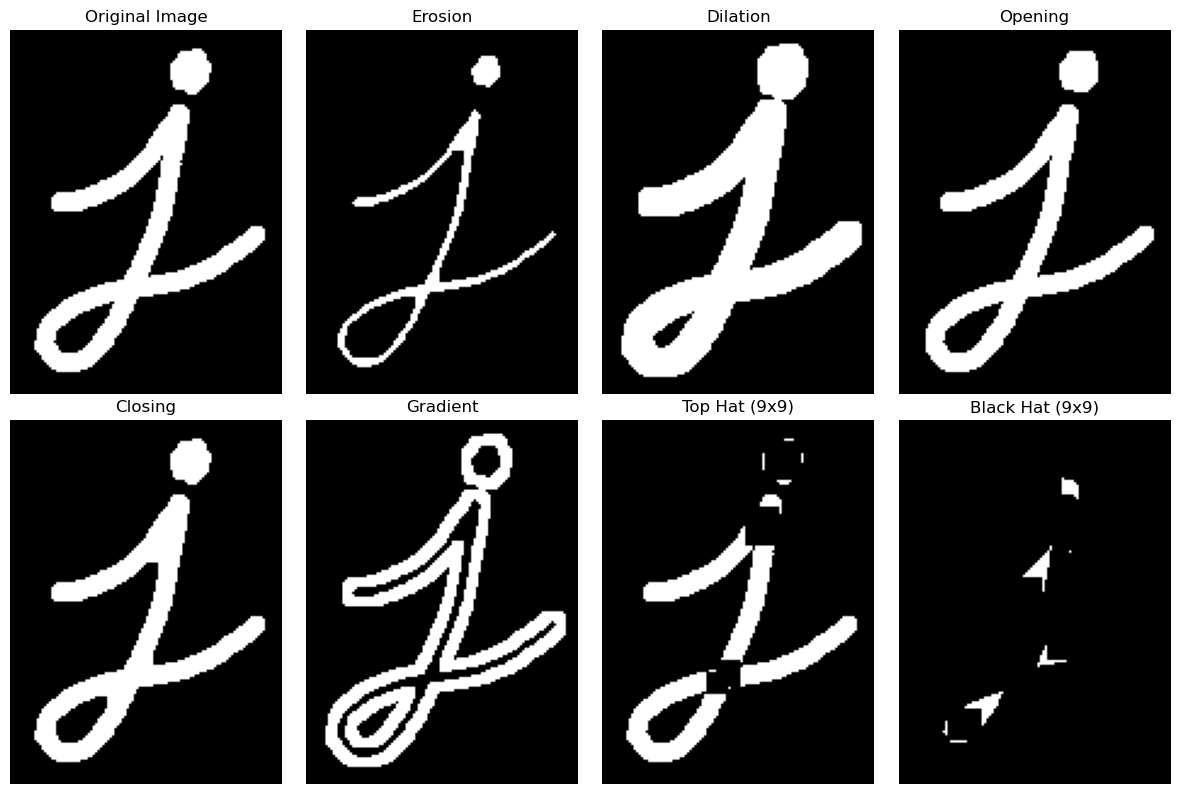

In [5]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
img = cv.imread('Image/j.png', cv.IMREAD_GRAYSCALE)  # Replace with your actual image path
assert img is not None, "Image not found or unable to load."

# Define kernels
kernel_5x5 = np.ones((5, 5), np.uint8)
kernel_9x9 = np.ones((9, 9), np.uint8)  # Used only for Top Hat

# Perform morphological transformations
erosion = cv.erode(img, kernel_5x5, iterations=1)
dilation = cv.dilate(img, kernel_5x5, iterations=1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel_5x5)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel_5x5)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel_5x5)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel_9x9)  # Different kernel here
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel_9x9)

# Display results
titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient', 'Top Hat (9x9)', 'Black Hat (9x9)']
images = [img, erosion, dilation, opening, closing, gradient, tophat, blackhat]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


### 🔧 Structuring Element  
Instead of using rectangular kernels created via `np.ones()`, OpenCV provides:

```py
cv.getStructuringElement(shape, ksize)

**Examples:**  

🟥 Rectangular

```py
cv.getStructuringElement(cv.MORPH_RECT, (5,5))

array([[1, 1, 1, 1, 1], 
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)


🟠 Elliptical

```py
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

✝️ Cross-shaped

```py
cv.getStructuringElement(cv.MORPH_CROSS, (5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

🔷 Diamond-shaped (if supported)

```py
cv.getStructuringElement(cv.MORPH_DIAMOND, (5,5))

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)